# Analysis — Serie A (20/21 season) — Data after Match Week 7

## DataFrame  —  GOAL and SHOT CREATION by SQUAD

In [1]:
import pandas as pd
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import matplotlib.pyplot as plt
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import seaborn as sns
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
%matplotlib inline

In [4]:
#plt.style.use('seaborn-whitegrid')
#plt.style.use('dark_background')
#plt.style.use('fivethirtyeight')

#fig, ax = plt.subplots()

In [5]:
#plt.style.use(['fivethirtyeight','dark_background'])
#plt.style.use(['seaborn','dark_background'])
#plt.style.use(['ggplot','dark_background'])
#plt.style.use(['seaborn-whitegrid','dark_background'])

plt.style.use(
              [
               'bmh',
               'dark_background'
              ]
             )

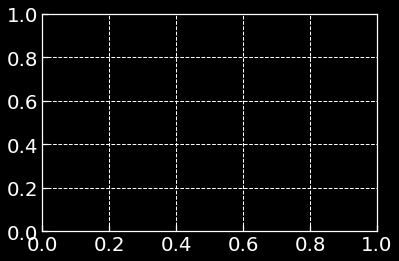

In [6]:
#sns.set_context('notebook')
#sns.set_context('paper')
#sns.set_context('talk')
#sns.set_context('poster')

sns.set_context(
                'notebook',
                font_scale = 1.8
               )

fig, ax = plt.subplots()

## PART (1) — LOAD into DataFrame(s)

In [7]:
Goal_and_Shot_Creation_df = pd.read_csv("Squad_Goal_and_Shot_Creation.csv")

Goal_and_Shot_Creation_df

,Squad,# Pl,90s,SCA,SCA90,PassLive_SCA,PassDead_SCA,Drib_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA,GCA90,PassLive_GCA,PassDead_GCA,Drib_GCA,Sh_GCA,Fld_GCA,Def_GCA,OG_GCA
0,Atalanta,23,7.0,188,26.86,152,5,13,6,10,2,32,4.57,26,0,4,0,1,1,0
1,Benevento,21,7.0,91,13.00,64,9,2,5,7,4,12,1.71,8,3,0,1,0,0,0
2,Bologna,22,7.0,182,26.00,138,12,7,13,9,3,18,2.57,17,0,0,0,0,1,0
3,Cagliari,22,7.0,136,19.43,100,8,7,9,9,3,25,3.57,17,1,2,2,2,1,0
4,Crotone,25,7.0,106,15.14,78,12,4,1,7,4,8,1.14,4,1,0,0,2,1,0
5,Fiorentina,23,7.0,121,17.29,99,8,5,3,6,0,15,2.14,12,1,1,1,0,0,0
6,Genoa,26,7.0,98,14.00,76,7,1,5,6,3,10,1.43,10,0,0,0,0,0,0
7,Hellas Verona,26,7.0,106,15.14,76,12,5,4,7,2,12,1.71,9,0,0,2,1,0,0
8,Inter,22,7.0,191,27.29,163,11,7,6,2,2,24,3.43,18,2,1,2,1,0,0
9,Juventus,23,6.0,139,23.17,104,10,9,4,11,1,21,3.50,14,0,5,1,1,0,0


### Columns list:

In [8]:
columns_list = list(
                    Goal_and_Shot_Creation_df.columns
                   )
columns_list

['Squad',
 '# Pl',
 '90s',
 'SCA',
 'SCA90',
 'PassLive_SCA',
 'PassDead_SCA',
 'Drib_SCA',
 'Sh_SCA',
 'Fld_SCA',
 'Def_SCA',
 'GCA',
 'GCA90',
 'PassLive_GCA',
 'PassDead_GCA',
 'Drib_GCA',
 'Sh_GCA',
 'Fld_GCA',
 'Def_GCA',
 'OG_GCA']

## PART (2) — identify RANKINGS per column

In [9]:
Goal_and_Shot_Creation_Ranked_df = Goal_and_Shot_Creation_df.rank(ascending = 0,
                                                           #      '0' = 'False'
                                                                  method = 'min')

Goal_and_Shot_Creation_Ranked_df = Goal_and_Shot_Creation_Ranked_df.astype(int)


Goal_and_Shot_Creation_Ranked_df['Squad'] = list(map(str.upper,
                                                     Goal_and_Shot_Creation_df['Squad']
                                                    )
                                                )
Goal_and_Shot_Creation_Ranked_df

,Squad,# Pl,90s,SCA,SCA90,PassLive_SCA,PassDead_SCA,Drib_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA,GCA90,PassLive_GCA,PassDead_GCA,Drib_GCA,Sh_GCA,Fld_GCA,Def_GCA,OG_GCA
0,ATALANTA,9,1,3,4,2,20,3,9,4,12,1,1,1,13,3,15,8,1,1
1,BENEVENTO,19,1,20,20,20,11,19,12,8,4,16,16,18,1,14,8,16,8,1
2,BOLOGNA,14,1,6,6,3,4,11,2,5,6,9,9,3,13,14,15,16,1,1
3,CAGLIARI,14,1,10,10,10,13,11,4,5,6,3,4,3,6,6,3,3,1,1
4,CROTONE,6,1,15,15,14,4,17,20,8,4,20,20,20,6,14,15,3,1,1
5,FIORENTINA,9,1,12,12,11,13,15,18,13,19,14,14,14,6,9,8,16,8,1
6,GENOA,2,1,19,19,15,18,20,12,13,6,18,18,16,13,14,15,16,8,1
7,HELLAS VERONA,2,1,15,15,15,4,15,16,8,12,16,16,17,13,14,3,8,8,1
8,INTER,14,1,2,3,1,7,11,9,19,12,6,7,2,2,9,3,8,8,1
9,JUVENTUS,9,19,9,8,9,9,7,16,3,17,8,6,9,13,1,8,8,8,1


In [10]:
Goal_and_Shot_Creation_Ranked_df.set_index('Squad',
                                           inplace = True)
Goal_and_Shot_Creation_Ranked_df

,# Pl,90s,SCA,SCA90,PassLive_SCA,PassDead_SCA,Drib_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA,GCA90,PassLive_GCA,PassDead_GCA,Drib_GCA,Sh_GCA,Fld_GCA,Def_GCA,OG_GCA
Squad,,,,,,,,,,,,,,,,,,,
ATALANTA,9,1,3,4,2,20,3,9,4,12,1,1,1,13,3,15,8,1,1
BENEVENTO,19,1,20,20,20,11,19,12,8,4,16,16,18,1,14,8,16,8,1
BOLOGNA,14,1,6,6,3,4,11,2,5,6,9,9,3,13,14,15,16,1,1
CAGLIARI,14,1,10,10,10,13,11,4,5,6,3,4,3,6,6,3,3,1,1
CROTONE,6,1,15,15,14,4,17,20,8,4,20,20,20,6,14,15,3,1,1
FIORENTINA,9,1,12,12,11,13,15,18,13,19,14,14,14,6,9,8,16,8,1
GENOA,2,1,19,19,15,18,20,12,13,6,18,18,16,13,14,15,16,8,1
HELLAS VERONA,2,1,15,15,15,4,15,16,8,12,16,16,17,13,14,3,8,8,1
INTER,14,1,2,3,1,7,11,9,19,12,6,7,2,2,9,3,8,8,1


In [11]:
Goal_and_Shot_Creation_Ranks_Transposed = Goal_and_Shot_Creation_Ranked_df.transpose()

Goal_and_Shot_Creation_Ranks_Transposed

Squad,ATALANTA,BENEVENTO,BOLOGNA,CAGLIARI,CROTONE,FIORENTINA,GENOA,HELLAS VERONA,INTER,JUVENTUS,LAZIO,MILAN,NAPOLI,PARMA,ROMA,SAMPDORIA,SASSUOLO,SPEZIA,TORINO,UDINESE
# Pl,9,19,14,14,6,9,2,2,14,9,6,9,14,2,19,8,9,1,14,2
90s,1,1,1,1,1,1,1,1,1,19,1,1,19,1,1,1,1,1,1,1
SCA,3,20,6,10,15,12,19,15,2,9,8,1,4,18,7,14,5,13,17,11
SCA90,4,20,6,10,15,12,19,15,3,8,9,2,1,18,7,14,5,13,17,11
PassLive_SCA,2,20,3,10,14,11,15,15,1,9,8,6,4,17,7,17,5,13,19,12
PassDead_SCA,20,11,4,13,4,13,18,4,7,9,18,1,7,13,2,13,3,13,9,11
Drib_SCA,3,19,11,11,17,15,20,15,11,7,11,7,1,7,2,17,4,5,10,6
Sh_SCA,9,12,2,4,20,18,12,16,9,16,12,1,5,19,5,5,3,8,12,9
Fld_SCA,4,8,5,5,8,13,13,8,19,3,18,1,5,13,8,8,2,19,13,17
Def_SCA,12,4,6,6,4,19,6,12,12,17,19,6,1,12,6,2,12,17,3,6


In [12]:
Goal_and_Shot_Creation_Ranks_Transposed.reset_index(inplace = True)

Goal_and_Shot_Creation_Ranks_Transposed.rename(columns = {'index':'SQUAD'
                                                         },
                                             # order = {
#                                                        'OLD' : 'NEW'
#                                                      }
                                               inplace = True)
Goal_and_Shot_Creation_Ranks_Transposed

Squad,SQUAD,ATALANTA,BENEVENTO,BOLOGNA,CAGLIARI,CROTONE,FIORENTINA,GENOA,HELLAS VERONA,INTER,...,LAZIO,MILAN,NAPOLI,PARMA,ROMA,SAMPDORIA,SASSUOLO,SPEZIA,TORINO,UDINESE
0,# Pl,9,19,14,14,6,9,2,2,14,...,6,9,14,2,19,8,9,1,14,2
1,90s,1,1,1,1,1,1,1,1,1,...,1,1,19,1,1,1,1,1,1,1
2,SCA,3,20,6,10,15,12,19,15,2,...,8,1,4,18,7,14,5,13,17,11
3,SCA90,4,20,6,10,15,12,19,15,3,...,9,2,1,18,7,14,5,13,17,11
4,PassLive_SCA,2,20,3,10,14,11,15,15,1,...,8,6,4,17,7,17,5,13,19,12
5,PassDead_SCA,20,11,4,13,4,13,18,4,7,...,18,1,7,13,2,13,3,13,9,11
6,Drib_SCA,3,19,11,11,17,15,20,15,11,...,11,7,1,7,2,17,4,5,10,6
7,Sh_SCA,9,12,2,4,20,18,12,16,9,...,12,1,5,19,5,5,3,8,12,9
8,Fld_SCA,4,8,5,5,8,13,13,8,19,...,18,1,5,13,8,8,2,19,13,17
9,Def_SCA,12,4,6,6,4,19,6,12,12,...,19,6,1,12,6,2,12,17,3,6


In [13]:
Goal_and_Shot_Creation_Rankings = Goal_and_Shot_Creation_Ranks_Transposed.sort_values('INTER')
Goal_and_Shot_Creation_Rankings

Squad,SQUAD,ATALANTA,BENEVENTO,BOLOGNA,CAGLIARI,CROTONE,FIORENTINA,GENOA,HELLAS VERONA,INTER,...,LAZIO,MILAN,NAPOLI,PARMA,ROMA,SAMPDORIA,SASSUOLO,SPEZIA,TORINO,UDINESE
18,OG_GCA,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,90s,1,1,1,1,1,1,1,1,1,...,1,1,19,1,1,1,1,1,1,1
4,PassLive_SCA,2,20,3,10,14,11,15,15,1,...,8,6,4,17,7,17,5,13,19,12
2,SCA,3,20,6,10,15,12,19,15,2,...,8,1,4,18,7,14,5,13,17,11
12,PassLive_GCA,1,18,3,3,20,14,16,17,2,...,11,9,6,15,7,7,3,11,11,19
13,PassDead_GCA,13,1,13,6,6,6,13,13,2,...,13,6,6,13,2,13,2,2,6,6
3,SCA90,4,20,6,10,15,12,19,15,3,...,9,2,1,18,7,14,5,13,17,11
15,Sh_GCA,15,8,15,3,15,8,15,3,3,...,3,1,8,8,1,15,8,3,8,15
10,GCA,1,16,9,3,20,14,18,16,6,...,9,6,3,15,3,9,2,9,9,19
5,PassDead_SCA,20,11,4,13,4,13,18,4,7,...,18,1,7,13,2,13,3,13,9,11


In [14]:
Goal_and_Shot_Creation_Rankings.reset_index(inplace = True,
                                            drop = True)
Goal_and_Shot_Creation_Rankings

Squad,SQUAD,ATALANTA,BENEVENTO,BOLOGNA,CAGLIARI,CROTONE,FIORENTINA,GENOA,HELLAS VERONA,INTER,...,LAZIO,MILAN,NAPOLI,PARMA,ROMA,SAMPDORIA,SASSUOLO,SPEZIA,TORINO,UDINESE
0,OG_GCA,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,90s,1,1,1,1,1,1,1,1,1,...,1,1,19,1,1,1,1,1,1,1
2,PassLive_SCA,2,20,3,10,14,11,15,15,1,...,8,6,4,17,7,17,5,13,19,12
3,SCA,3,20,6,10,15,12,19,15,2,...,8,1,4,18,7,14,5,13,17,11
4,PassLive_GCA,1,18,3,3,20,14,16,17,2,...,11,9,6,15,7,7,3,11,11,19
5,PassDead_GCA,13,1,13,6,6,6,13,13,2,...,13,6,6,13,2,13,2,2,6,6
6,SCA90,4,20,6,10,15,12,19,15,3,...,9,2,1,18,7,14,5,13,17,11
7,Sh_GCA,15,8,15,3,15,8,15,3,3,...,3,1,8,8,1,15,8,3,8,15
8,GCA,1,16,9,3,20,14,18,16,6,...,9,6,3,15,3,9,2,9,9,19
9,PassDead_SCA,20,11,4,13,4,13,18,4,7,...,18,1,7,13,2,13,3,13,9,11


In [15]:
Inter_Rankings_df = (
                     Goal_and_Shot_Creation_Rankings[['SQUAD',
                                                      'INTER']]
                     .rename(
                             columns = {
                                        'SQUAD' : 'Goal_and_Shot_Creation_Variable'
                                       }
# renamed column input order ~~~~~~~~> {'OLD' : 'NEW'}
                            )
                     .set_index(
                                'Goal_and_Shot_Creation_Variable'
                               )
                    )
Inter_Rankings_df

Squad,INTER
Goal_and_Shot_Creation_Variable,
OG_GCA,1
90s,1
PassLive_SCA,1
SCA,2
PassLive_GCA,2
PassDead_GCA,2
SCA90,3
Sh_GCA,3
GCA,6


<AxesSubplot:ylabel='Frequency'>

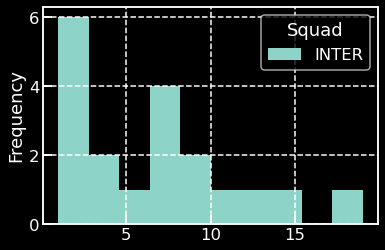

In [16]:
sns.set_context('talk')

Inter_Rankings_df.plot.hist()

In [17]:
Inter_Ranking_Value_Counts = (
                              Inter_Rankings_df[
                                                'INTER'
                                               ]
                              .value_counts()
                              
                              .reset_index(
                                           name = 'Distinct_Variable_Count'
                                          )
                              .rename(
                                      columns = {
                                                 'index':'Goal_and_Shot_Creation_Stat_Rank'
                                                }
                                     )
                              .sort_values(
                                           'Goal_and_Shot_Creation_Stat_Rank'
                                          )
                             )
Inter_Ranking_Value_Counts

,Goal_and_Shot_Creation_Stat_Rank,Distinct_Variable_Count
1,1,3
0,2,3
5,3,2
10,6,1
4,7,2
3,8,2
2,9,2
9,11,1
8,12,1
7,14,1


In [18]:
#TACKLING_by_PITCH_THIRD_df = (#Defensive_Action_Ranking_df[  # 'Squad' #~~~> index is...
                                                             #  ...automatically included
#                              Defensive_Actions_df[
#                                                   [
#                                                    'Squad',
                                                    
#                                                    'Tkl_Def3rd',
#                                                    'Tkl_Mid3rd',
#                                                    'Tkl_Att3rd'
#                                                   ]
#                                                  ]
#                              .sort_values(
#                                           'Tkl_Att3rd',
#                                           ascending = False
#                                          )
#                              .set_index(
#                                         'Squad'
#                                        )
#                             )
#TACKLING_by_PITCH_THIRD_df

PRESSING_by_PITCH_THIRD_df = (
                              Defensive_Actions_df[[
                                                    'Squad',                                                    
                                                    'Press_Def3rd',
                                                    'Press_Mid3rd',
                                                    'Press_Att3rd'
                                                   ]]
                              .sort_values(
                                           'Press_Att3rd',
                                           ascending = False
                                          )
                              .set_index(
                                         'Squad'
                                        )
                             )
PRESSING_by_PITCH_THIRD_df

## PART (3) — actually PLOTTING the data

sns.set_context(
                'poster',
                font_scale = 2.4
               )

fig, ax = plt.subplots(
                       figsize = (
                                  120,  # horizontal WIDTH
                                  60    # vertical HEIGHT
                                 )
                      )

#### set the positions and width for the bars

pos = list(range(
                 len(
                     TACKLING_by_PITCH_THIRD_df['Tkl_Def3rd']
                    )
                ))
width = 0.25


#### create the bars, in position pos, for Y-axis Variable #1
plt.bar(
        pos,
        
        TACKLING_by_PITCH_THIRD_df['Tkl_Def3rd'], 

        width,
        #alpha = 0.9,
        color = 'purple'   #'#EE3224'
       ) 

#### create bars, in position pos + width buffer, for Y-axis Variable #2
plt.bar([
         (p + width
         ) for p in pos
        ],
        
        TACKLING_by_PITCH_THIRD_df['Tkl_Mid3rd'],

        width,
        #alpha = 0.9,
        color = 'green'     # 'yellow'   # 'lightblue'   #'#F78F1E'
       ) 

#### create bars, in position pos + width buffer, for Y-axis Variable #3
plt.bar([
         (p + width*2
         ) for p in pos
        ],
        
        TACKLING_by_PITCH_THIRD_df['Tkl_Att3rd'], 

        width,
        alpha = 0.8,
        color = 'orange'   #'#FFC222'
       ) 

#ax.set_title('Test', fontsize = 60)
plt.title(
          'TACKLING - Team Totals per Third of the Pitch',
          fontsize = 100,
          color = 'lightblue'    # 'yellow'    # 'goldenrod'
         )

#ax.set_ylabel('Test Y label')
#plt.ylabel('TACKLING - Totals per Third of the Pitch',fontsize = 70)
#plt.xlabel('SQUADS', fontsize = 35, color = 'yellow')

ax.set_xticks(
              [
               (p + width
               ) for p in pos
              ]                  #  , rot = 90
             )

ax.set_xticklabels(TACKLING_by_PITCH_THIRD_df.index)  # ['Squad'])

plt.xlim(
         min(pos) - (width * 1.5),
         max(pos) + (width * 3.5)
        )

plt.ylim([
          0,
          (max(
               TACKLING_by_PITCH_THIRD_df['Tkl_Def3rd']
              ) * 1.03)
         ])

plt.legend(
           [
            'DEFENSIVE third',
            'MIDDLE third',
            'ATTACKING third'
           ],
           loc = 'upper right'
          )
plt.grid()

plt.show()

sns.set_context(
                'poster',
                font_scale = 2.4
               )

fig, ax = plt.subplots(
                       figsize = (
                                  120,  # horizontal WIDTH
                                  60    # vertical HEIGHT
                                 )
                      )

pos = list(range(
                 len(
                     PRESSING_by_PITCH_THIRD_df['Press_Def3rd']
                    )
                ))
width = 0.25


#### create the bars, in position pos, for Y-axis Variable #1
plt.bar(
        pos,
        
        PRESSING_by_PITCH_THIRD_df['Press_Def3rd'], 

        width, #alpha = 0.9,
        color = 'purple'
       ) 

#### create bars, in position pos + width buffer, for Y-axis Variable #2
plt.bar([
         (p + width
         ) for p in pos
        ],
        
        PRESSING_by_PITCH_THIRD_df['Press_Mid3rd'],

        width, #alpha = 0.9,
        color = 'green'
       ) 

#### create bars, in position pos + width buffer, for Y-axis Variable #3
plt.bar([
         (p + width*2
         ) for p in pos
        ],
        
        PRESSING_by_PITCH_THIRD_df['Press_Att3rd'], 

        width,
        alpha = 0.8,
        color = 'orange'
       ) 

plt.title(
          'PRESSING - Team Totals per Third of the Pitch',
          fontsize = 100,
          color = 'lightblue'    # 'yellow'    # 'goldenrod'
         )

ax.set_xticks(
              [
               (p + width
               ) for p in pos
              ]                  #  , rot = 90
             )

ax.set_xticklabels(
                   PRESSING_by_PITCH_THIRD_df.index
                  )                       # ['Squad'])

plt.xlim(
         min(pos) - (width * 1.5),
         max(pos) + (width * 3.5)
        )

plt.ylim([
          0,
          (max(
               PRESSING_by_PITCH_THIRD_df['Press_Mid3rd']
              ) * 1.03)
         ])

plt.legend(
           [
            'DEFENSIVE third',
            'MIDDLE third',
            'ATTACKING third'
           ],
           loc = 'upper right'
          )
plt.grid()

plt.show()

4

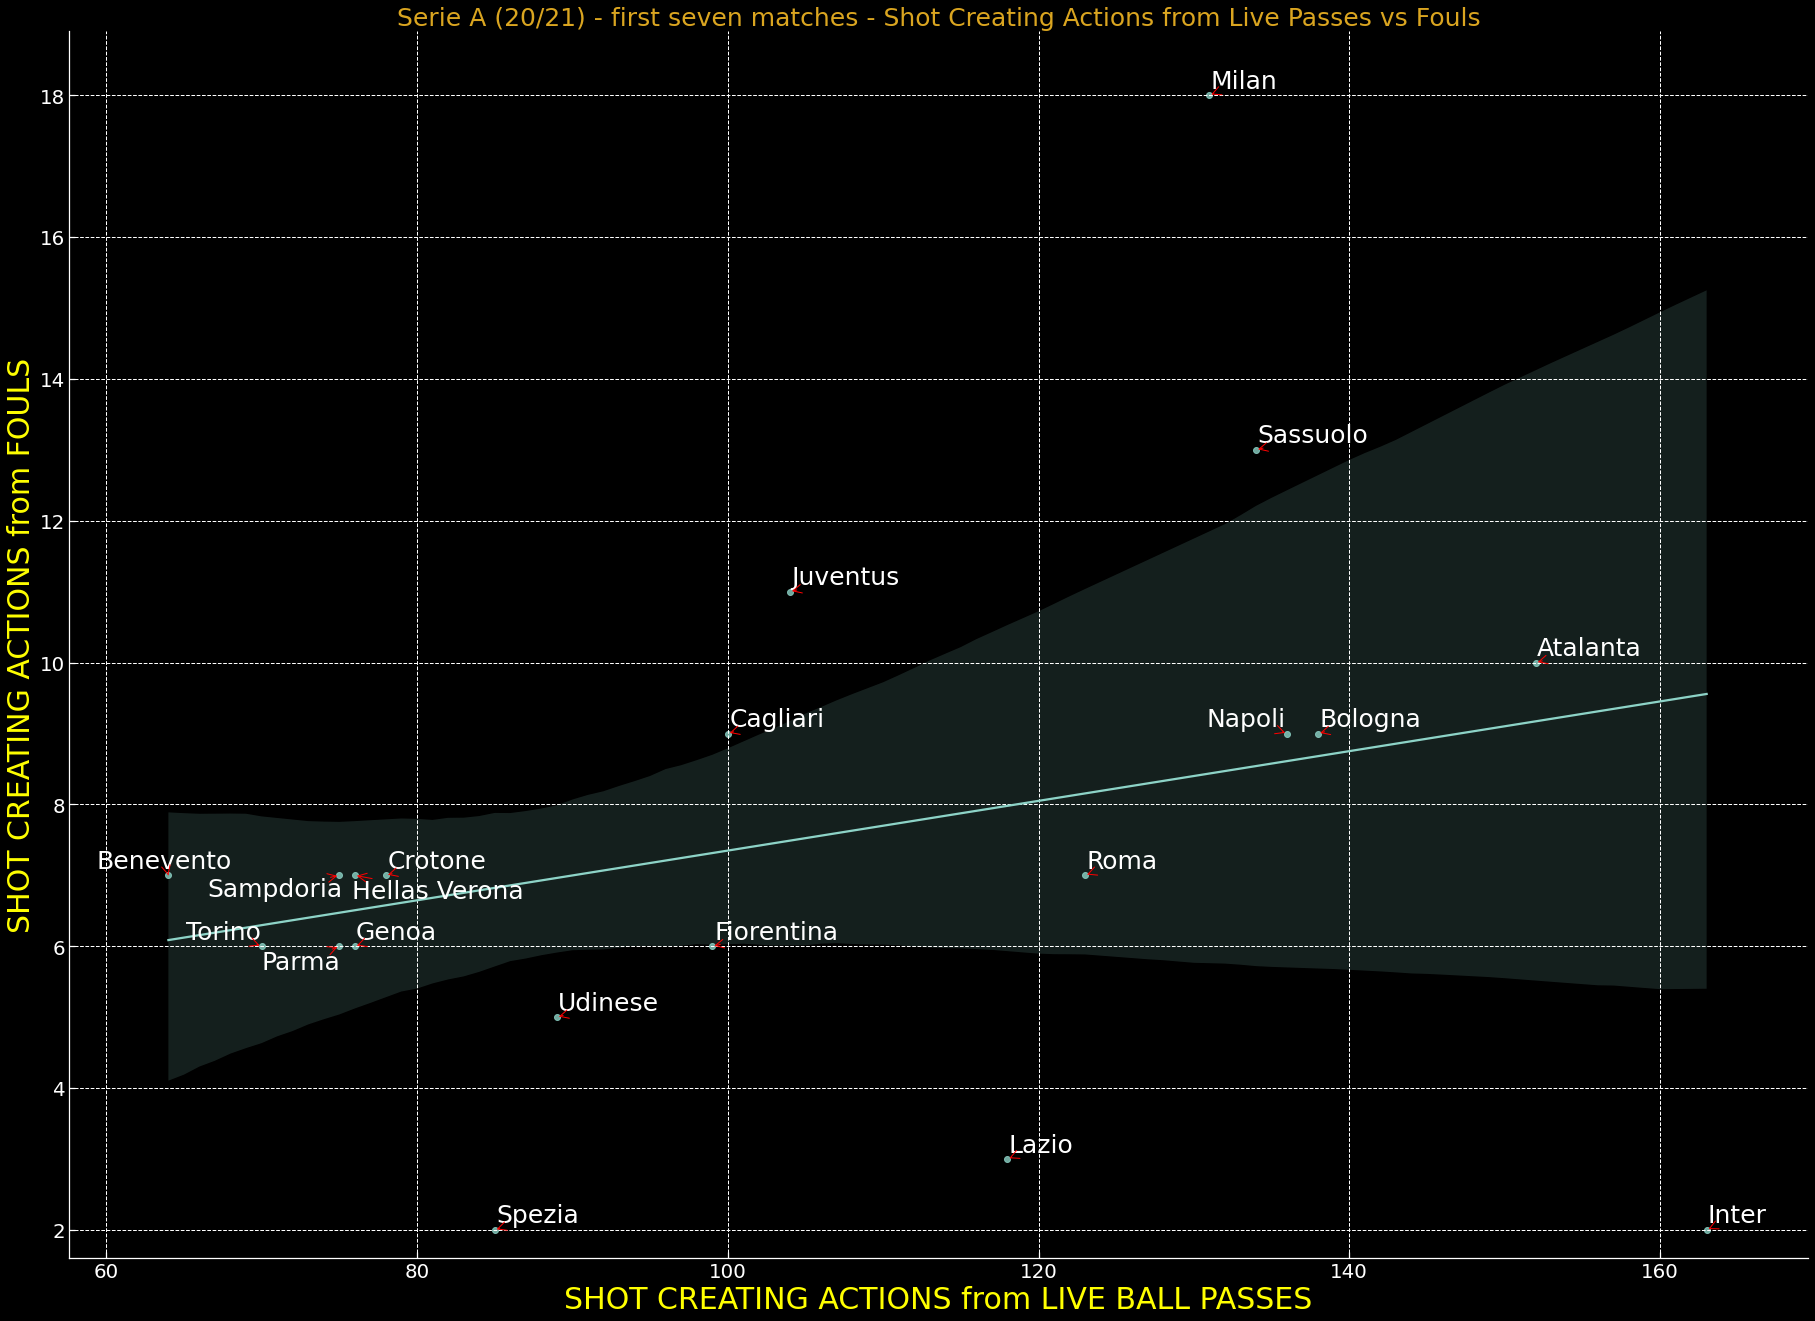

In [19]:
sns.set_context(
                'notebook',
                font_scale = 1.8
               )

ax = sns.lmplot(x = 'PassLive_SCA',                       # horizontal axis
                y = 'Fld_SCA',                       # vertical axis
                
                data = Goal_and_Shot_Creation_df,     # data source
                
                #fit_reg = False,            # do NOT fix a regression line
                fit_reg = True,
                
                height = 18,              
                aspect = 1.4      #  dimension of x-axis (sets width)
               )

x_col_min = Goal_and_Shot_Creation_df['PassLive_SCA'].min()
x_col_max = Goal_and_Shot_Creation_df['PassLive_SCA'].max()

y_col_min = Goal_and_Shot_Creation_df['Fld_SCA'].min()
y_col_max = Goal_and_Shot_Creation_df['Fld_SCA'].max()

plt.xlim((x_col_min * 0.9),
         (x_col_max * 1.04)
        )
plt.ylim((y_col_min * 0.8),
         (y_col_max * 1.05)
        )


plt.title('Serie A (20/21) - first seven matches - Shot Creating Actions from Live Passes vs Fouls',
          fontsize = 25,
          color = 'goldenrod'
         )

plt.xlabel('SHOT CREATING ACTIONS from LIVE BALL PASSES',
           fontsize = 30,
           color = 'yellow'
          )
plt.ylabel('SHOT CREATING ACTIONS from FOULS',
           fontsize = 30,
           color = 'yellow'
          )


point_labels = [plt.text(Goal_and_Shot_Creation_df.PassLive_SCA[i],
                         Goal_and_Shot_Creation_df.Fld_SCA[i],
                         
                         Goal_and_Shot_Creation_df.Squad[i],
                         fontsize = 25
                         
                        ) for i in range(len(Goal_and_Shot_Creation_df.Squad))
               ]


adjust_text(point_labels,
            arrowprops = dict(arrowstyle = '->',
                              color = 'red')
           )